# 梯度下降法

> 以下均為「董洪偉(2022)。打下最紮實AI基礎不依賴套件：手刻機器學習神經網路穩健前進。深智數位出版」一書之練習與筆記

若有以下函數與導函數：

函數 $f\left( x \right) = {x^3} – 3{x^2} – 9x + 2$

導函數 $f’\left( x \right) = 3{x^2} – 6{x} – 9.$

可以觀察到，一個連續函數 $f(x)$ 的極值（包含局部極大值或局部極小值）為$f'(x) = 0$。

（當然這是一個不完全的說法，詳情請見微積分相關書籍，這裡指的是一般情況）

含義：函數曲線在該點的斜率為零，切線是水平的。

範例：以上函數在 $x=3與x=-1$ 處有局部極小值，此時 $f'(0) = 0$。

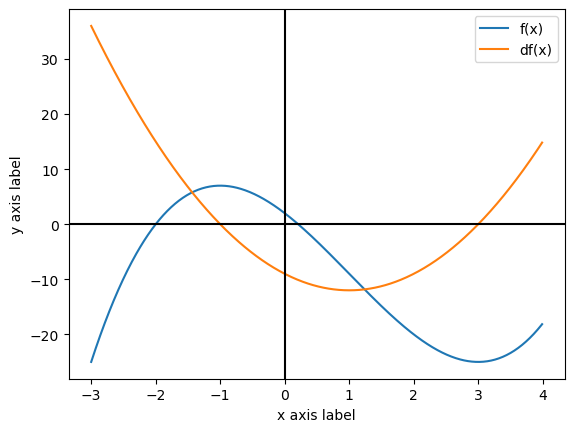

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-3, 4, 0.01)
f_x = np.power(x,3)-3*x**2-9*x+2
df_x = 3*x**2-6*x-9

plt.plot(x,f_x)
plt.plot(x,df_x)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.legend(['f(x)', "df(x)"])
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

## 一步一步來了解梯度下降

梯度下降是一個優化演算法，它利用函數的導數（梯度） 來判斷當前位置最陡峭的下坡方向。演算法會朝著梯度的反方向（即減去學習率乘以導數），反覆更新參數，以逐步找到函數的最小值。

函數 $f\left( x \right) = {x^2} + 0.2$

導函數 $f’\left( x \right) = 2x $

梯度下降函數 $x_1 = x_0 - \alpha \times f’\left( x \right) $

導數 $f'(x_0)$ 決定了X值需要移動的方向，以及移動瞬間的數量（變化率的大小）。

方向： 如果 $f'(x_0) > 0$（上坡），則 $x$ 應該減小（向左移）。如果 $f'(x_0) < 0$（下坡），則 $x$ 應該增大（向右移）。

數量（陡峭程度）： $|f'(x_0)|$ 的值越大，表示山坡越陡峭，瞬間變化量越大。在梯度下降中，陡峭度越大，我們計算出的移動步長 $(\alpha \cdot f'(x_0))$ 也越大，使我們能更快地接近谷底。

In [2]:
import numpy as np # 導入 NumPy 庫，通常用於數值計算

x = np.arange(-4, 4, 0.01)
# 創建一個 NumPy 數組 x，範圍從 -4 到 4（不包含 4），
# 步長為 0.01。這常用於繪圖或迭代計算的輸入值。

def y(x):
    # 定義目標函數 y(x) = x^2 + 0.2
    return np.power(x,2) + 0.2
    # np.power(x, 2) 計算 x 的平方。

def dy(x):
    # 定義目標函數 y(x) 的導數 dy/dx = 2x
    return 2 * x
    # 這是函數 y(x) 在特定點 x 上的斜率，用於梯度下降。

def grad(x, alpha=0.01):
    # 定義一個執行梯度下降一步的函數
    # x: 當前參數值（例如，模型的權重或位置）
    # alpha: 學習率（learning rate），控制每一步移動的大小，默認為 0.01

    # 梯度下降的更新公式：
    # 新 x = 舊 x - (學習率 * 導數)
    # 在這裡，導數是 dy(x) = 2x
    return x - alpha * 2 * x
    # 計算並返回梯度下降一步後的新 x 值。

來模擬一下，單純的先一步一步的做梯度下降。

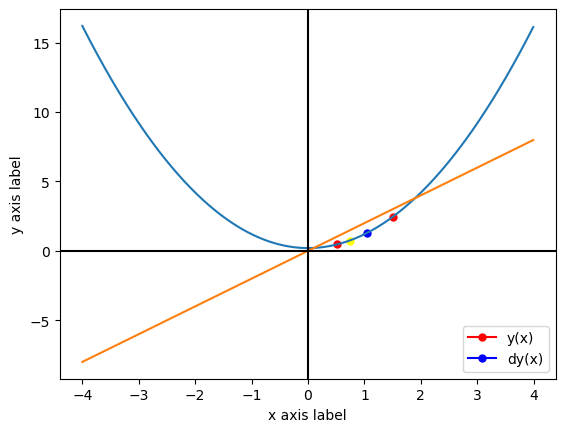

In [3]:
# 假設前面已執行了 'import numpy as np' 和 'import matplotlib.pyplot as plt'
# 假設前面已定義了 y(x), dy(x), grad(x, alpha) 函數
# 假設前面已定義了 x = np.arange(-4, 4, 0.01)

x1 = 1.5
y1 = y(x1)
# 步驟 1: 設定初始點 (x1, y1)
plt.plot(x1, y1, marker='o', linestyle='-', color='red', markersize=5)
# 在圖上標記第一個點 x1 = 1.5，使用紅色圓點。

# x2 = x1 - 0.15 * 2 * 1.5  # 註釋掉的代碼是手動計算的梯度下降公式
x2 = grad(x1, 0.15)
# 步驟 2: 執行第一次梯度下降
# 使用學習率 alpha = 0.15，將 x1 更新到 x2。
y2 = y(x2)
plt.plot(x2, y2, marker='o', linestyle='-', color='blue', markersize=5)
# 在圖上標記第二個點 (x2, y2)，使用藍色圓點。

x3 = grad(x2, 0.15)
# 步驟 3: 執行第二次梯度下降，從 x2 更新到 x3。
y3 = y(x3)
plt.plot(x3, y3, marker='o', linestyle='-', color='yellow', markersize=5)
# 在圖上標記第三個點 (x3, y3)，使用黃色圓點。

x4 = grad(x3, 0.15)
# 步驟 4: 執行第三次梯度下降，從 x3 更新到 x4。
y4 = y(x4)
plt.plot(x4, y4, marker='o', linestyle='-', color='red', markersize=5)
# 在圖上標記第四個點 (x4, y4)，使用紅色圓點。

plt.plot(x, y(x))
# 繪製目標函數 y(x) = x^2 + 0.2 的曲線。
plt.plot(x, dy(x))
# 繪製導數函數 dy(x) = 2x 的直線。

plt.xlabel('x axis label')
plt.ylabel('y axis label')
# 設定 x 軸和 y 軸的標籤。

plt.legend(['y(x)', "dy(x)"])
# 為曲線設定圖例：y(x) 和 dy(x)。

plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
# 繪製 x=0 和 y=0 的黑色參考線。

plt.show()
# 顯示繪製的圖表。

這次直接寫成迴圈來迭代

梯度已經相當小了！
1.5 3.0
1.05 2.1
0.7350000000000001 1.47
0.5145000000000001 1.029
0.3601500000000001 0.7203
0.2521050000000001 0.50421
0.17647350000000006 0.352947
0.12353145000000004 0.247063
0.08647201500000004 0.172944
0.060530410500000034 0.121061
0.04237128735000002 0.084743
0.029659901145000014 0.05932
0.02076193080150001 0.041524
0.014533351561050008 0.029067
0.010173346092735007 0.020347
0.0071213422649145045 0.014243
0.004984939585440154 0.00997
0.0034894577098081078 0.006979
0.0024426203968656753 0.004885
0.0017098342778059726 0.00342
0.0011968839944641809 0.002394
0.0008378187961249266 0.001676
0.0005864731572874486 0.001173
0.000410531210101214 0.000821


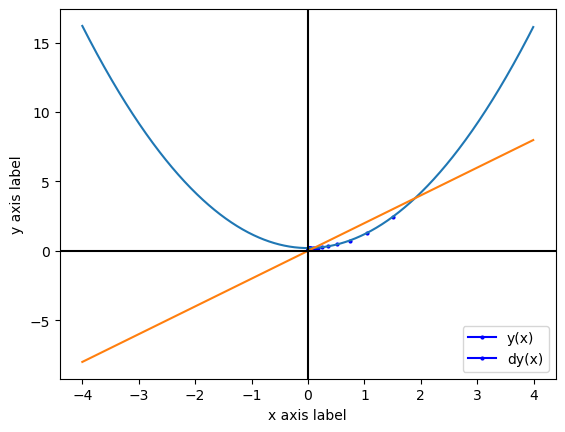

In [4]:
# 假設前面已定義了 y(x), dy(x), grad(x, alpha) 函數
# 假設 x = np.arange(-4, 4, 0.01)

history = [[1.5, 3.0]]
# 初始化歷史記錄列表 (history)。
# 列表儲存每次迭代的 [x 值, dy(x) 導數值]。
# 初始點 x = 1.5，其導數 dy(1.5) = 2 * 1.5 = 3.0。

for i in range(10000):
    # 設定最大迭代次數為 10000，防止無限迴圈。

    test_x = history[-1][0]
    # 獲取上一步的 x 值作為當前的 test_x。

    if abs(dy(test_x)) < 1e-3:
        # 檢查收斂條件：如果導數的絕對值（即梯度）小於 0.001
        print("梯度已經相當小了！")
        break
        # 則認為已收斂到最小值，跳出迴圈。

    plt.plot(test_x, y(test_x), marker='o', linestyle='-', color='blue', markersize=2)
    # 在圖表上標記當前迭代點 (test_x, y(test_x))。
    # 由於迭代次數可能很多，markersize=2 確保圖表不會過於混亂。

    test_x = grad(test_x, 0.15)
    # 執行梯度下降步驟：
    # test_x = test_x - 0.15 * dy(test_x)
    # 使用學習率 alpha = 0.15 更新 x 值。

    history.append([test_x, round(dy(test_x), 6)])
    # 將新的 x 值和其對應的導數值（四捨五入到小數點後 6 位）加入歷史記錄。

for item in history:
    print(item[0], item[1])
# 輸出每次迭代後的 x 值和導數值。
# 您會觀察到 x 值不斷趨近於 0，導數值不斷趨近於 0。

plt.plot(x, y(x))
plt.plot(x, dy(x))
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.legend(['y(x)', "dy(x)"])
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()
# 繪製圖表：y(x) 曲線、dy(x) 曲線，以及所有迭代點。

將梯度下降計算改為函式 gradient_descent()

梯度已經相當小了！在第 56 次迭代停止。
x: 1.500000, df(x): 3.000000, y(x): 2.450000
x: 1.050000, df(x): 2.100000, y(x): 1.302500
x: 0.735000, df(x): 1.470000, y(x): 0.740225
x: 0.514500, df(x): 1.029000, y(x): 0.464710
x: 0.360150, df(x): 0.720300, y(x): 0.329708
x: 0.252105, df(x): 0.504210, y(x): 0.263557
x: 0.176474, df(x): 0.352947, y(x): 0.231143
x: 0.123531, df(x): 0.247063, y(x): 0.215260
x: 0.086472, df(x): 0.172944, y(x): 0.207477
x: 0.060530, df(x): 0.121061, y(x): 0.203664
x: 0.042371, df(x): 0.084743, y(x): 0.201795
x: 0.029660, df(x): 0.059320, y(x): 0.200880
x: 0.020762, df(x): 0.041524, y(x): 0.200431
x: 0.014533, df(x): 0.029067, y(x): 0.200211
x: 0.010173, df(x): 0.020347, y(x): 0.200103
x: 0.007121, df(x): 0.014243, y(x): 0.200051
x: 0.004985, df(x): 0.009970, y(x): 0.200025
x: 0.003489, df(x): 0.006979, y(x): 0.200012
x: 0.002443, df(x): 0.004885, y(x): 0.200006
x: 0.001710, df(x): 0.003420, y(x): 0.200003
x: 0.001197, df(x): 0.002394, y(x): 0.200001
x: 0.000838, df(x): 0.001676, y(x

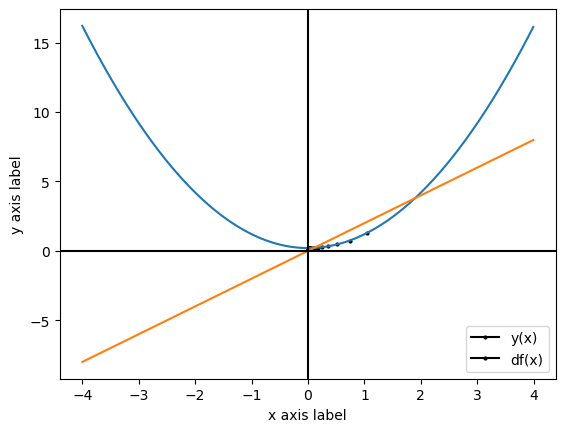

In [5]:
def gradient_descent_fixed(df, x_start, alpha=0.15, iterations=200, epsilon=1e-8):
    # 使用 y(x) 來計算目標函數值，用於繪圖/歷史記錄
    # 假設 y(x) 已經在全局定義
    x = x_start
    history = [[x, df(x), y(x)]] # 記錄 [x, 梯度(df), 損失(y)]

    for i in range(iterations):
        # 獲取當前梯度值
        gradient = df(x)

        if abs(gradient) < epsilon:
            print(f"梯度已經相當小了！在第 {i+1} 次迭代停止。")
            break

        # 梯度下降的核心步驟： x_new = x_old - alpha * gradient
        x = x - alpha * gradient

        # 記錄新的 x, 梯度和損失
        history.append([x, round(df(x), 6), y(x)])

        # 繪製點 (在目標函數曲線上)
        plt.plot(x, y(x), marker='o', linestyle='-', color='black', markersize=2)

    return history

# -----------------------------------------------------------
# 執行修正後的代碼
df_func = lambda x: 2 * x # 傳入導數
path_fixed = gradient_descent_fixed(df_func, 1.5, 0.15, 200)

for item in path_fixed:
    # 輸出： x, 梯度, 損失
    print(f"x: {item[0]:.6f}, df(x): {item[1]:.6f}, y(x): {item[2]:.6f}")

# 繪圖部分
plt.plot(x,y(x))
plt.plot(x,dy(x))
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.legend(['y(x)', "df(x)"])
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

梯度已經相當小了！在第 193 次迭代停止。
x: -0.500000, df(x): -5.250000, y(x): 5.625000
x: -0.447500, df(x): -5.714231, y(x): 5.337117
x: -0.390358, df(x): -6.200717, y(x): 4.996599
x: -0.328351, df(x): -6.706455, y(x): 4.596312
x: -0.261286, df(x): -7.227473, y(x): 4.128925
x: -0.189011, df(x): -7.758757, y(x): 3.587173
x: -0.111424, df(x): -8.294212, y(x): 2.964184
x: -0.028482, df(x): -8.826677, y(x): 2.253877
x: 0.059785, df(x): -9.347988, y(x): 1.451424
x: 0.153265, df(x): -9.849120, y(x): 0.553744
x: 0.251756, df(x): -10.320394, y(x): -0.439994
x: 0.354960, df(x): -10.751771, y(x): -1.527909
x: 0.462478, df(x): -11.133210, y(x): -2.705042
x: 0.573810, df(x): -11.455086, y(x): -3.963133
x: 0.688361, df(x): -11.708643, y(x): -5.290597
x: 0.805447, df(x): -11.886448, y(x): -6.672732
x: 0.924312, df(x): -11.982814, y(x): -8.092176
x: 1.044140, df(x): -11.994155, y(x): -9.529594
x: 1.164082, df(x): -11.919232, y(x): -10.964561
x: 1.283274, df(x): -11.759268, y(x): -12.376555
x: 1.400867, df(x): -11.517

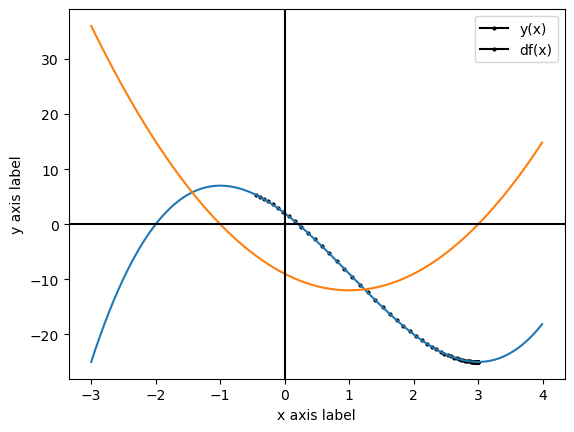

In [6]:
import numpy as np # 導入 NumPy 庫，通常用於數值計算

x = np.arange(-3, 4, 0.01)
# 創建一個 NumPy 數組 x，範圍從 -4 到 4（不包含 4），
# 步長為 0.01。這常用於繪圖或迭代計算的輸入值。

def y(x):
    return np.power(x,3) - 3 * np.power(x, 2) - 9 * x + 2

def dy(x):
    return 3 * np.power(x,2) - 6 * x - 9

# 執行修正後的代碼
df_func = lambda x: dy(x) # 傳入導數
path_fixed = gradient_descent_fixed(df_func, -0.5, 0.01, 200)

for item in path_fixed:
    # 輸出： x, 梯度, 損失
    print(f"x: {item[0]:.6f}, df(x): {item[1]:.6f}, y(x): {item[2]:.6f}")

# 繪圖部分
plt.plot(x,y(x))
plt.plot(x,dy(x))
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.legend(['y(x)', "df(x)"])
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

視覺化一個著名的數學測試函數——Beale's Function。這個函數常被用來測試優化演算法（如梯度下降），因為它具有平坦的區域和陡峭的邊緣，對演算法來說是一個挑戰。

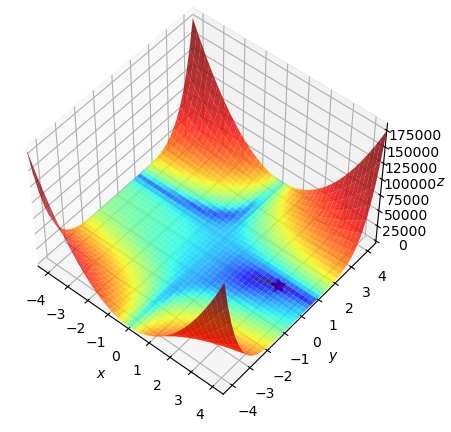

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 導入 3D 繪圖工具箱
from matplotlib.colors import LogNorm    # 導入對數常態化工具，用於處理數值差異巨大的顏色對比
import random

# 在 Jupyter Notebook 中直接顯示圖表
%matplotlib inline

# 定義目標函數 f(x, y)：這是 Beale's Function
# 它是一個二元函數，我們通常希望能找到讓這個函數值最小的 (x, y)
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

# 已知的全局最小值位置：當 x=3, y=0.5 時，f(x, y) = 0
minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1) # 重新調整形狀以利繪圖使用

# 設定繪圖範圍與步長
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

# 產生 x 和 y 的數組
x_list = np.arange(xmin, xmax + xstep, xstep)
y_list = np.arange(ymin, ymax + ystep, ystep)

# 建立網格矩陣 (Meshgrid)，將 x, y 向量轉化為座標平面上的所有點組合
x, y = np.meshgrid(x_list, y_list)

# 計算網格上每一點對應的函數值 z
z = f(x, y)

# 建立畫布與 3D 座標軸
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50) # elev 和 azim 設定視角高度與方位角

# 繪製 3D 曲面圖
ax.plot_surface(x, y, z,
                norm=LogNorm(),        # 使用對數縮放顏色，避免數值過大導致顏色集中在某一端
                rstride=1, cstride=1,  # 設定取樣步長，1 表示使用所有數據點
                edgecolor='none',      # 隱藏網格線，讓曲面更平滑
                alpha=.8,              # 設定透明度
                cmap=plt.cm.jet)       # 使用 'jet' 顏色映射（紅高藍低）

# 在圖上標註真正的最小值位置 (3, 0.5)
# f(*minima_) 會將座標解構成函數參數，標記為一顆紅星 ('r*')
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

# 設定座標軸標籤
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

# 設定軸範圍
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

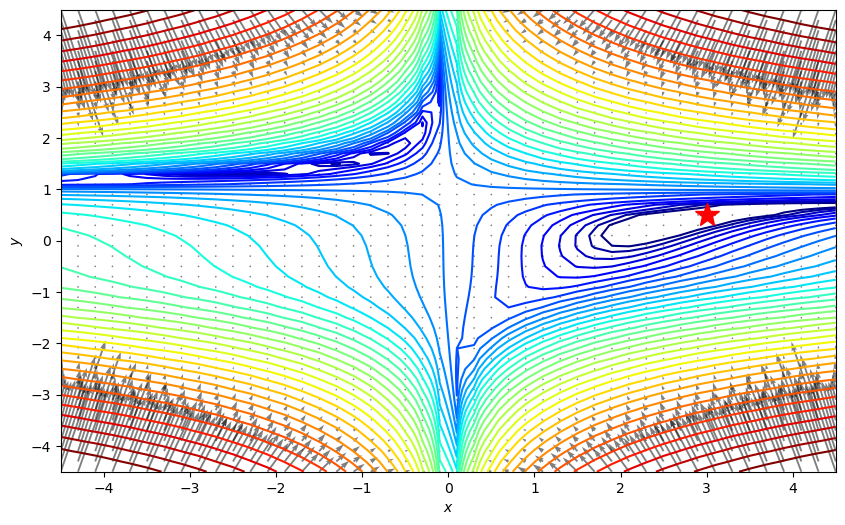

In [8]:
# 定義 Beale's Function 對 x 的偏導數 (Partial Derivative w.r.t. x)
df_x  = lambda x, y: 2*(1.5 - x + x*y)*(y-1) + 2*(2.25 - x + x*y**2)*(y**2-1) + 2*(2.625 - x + x*y**3)*(y**3-1)

# 定義 Beale's Function 對 y 的偏導數 (Partial Derivative w.r.t. y)
df_y  = lambda x, y: 2*(1.5 - x + x*y)*x + 2*(2.25 - x + x*y**2)*(2*x*y) + 2*(2.625 - x + x*y**3)*(3*x*y**2)

# 計算網格上每一點的梯度值（即該點在 x 與 y 方向的瞬間變化量）
dz_dx = df_x(x, y)
dz_dy = df_y(x, y)

fig, ax = plt.subplots(figsize=(10, 6))

# 繪製等高線圖
# levels: 設定等高線的數值層級，這裡用 logspace 產生對數間隔的線，適合數值差異極大的函數
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)

# 繪製向量場 (Quiver Plot)
# 這裡展示的是梯度下降的方向。
# 參數說明：x, y 是起點，x - dz_dx 和 y - dz_dy 是箭頭指向的終點方向
# 它會在地圖上畫滿小箭頭，告訴你：「如果你站在這，下一步該往哪走」
ax.quiver(x, y, -dz_dx, -dz_dy, alpha=.5)
# 註：原程式碼 x - dz_dx 在 quiver 中通常簡化為方向向量 (-dz_dx, -dz_dy)

# 標註紅星（全局最小值點）
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [9]:
# 定義梯度函數 df(x)
# 注意：這裡的 x 是一個向量 [x_coordinate, y_coordinate]
df = lambda x: np.array([
    # 這是對 x 的偏導數 (dz/dx)
    2*(1.5 - x[0] + x[0]*x[1])*(x[1]-1) + 2*(2.25 - x[0] + x[0]*x[1]**2)*(x[1]**2-1)
    + 2*(2.625 - x[0] + x[0]*x[1]**3)*(x[1]**3-1),
    # 這是對 y 的偏導數 (dz/dy)
    2*(1.5 - x[0] + x[0]*x[1])*x[0] + 2*(2.25 - x[0] + x[0]*x[1]**2)*(2*x[0]*x[1])
    + 2*(2.625 - x[0] + x[0]*x[1]**3)*(3*x[0]*x[1]**2)
])

def gradient_descent(df, x, alpha=0.01, iterations=100, epsilon=1e-8):
    history = [x]  # 用來記錄路徑上的每一個 [x, y] 點
    for i in range(iterations):
        # 檢查收斂：np.max(np.abs(df(x))) 找出 x 或 y 方向中較大的那個梯度
        # 如果最大的梯度都小於門檻值，代表已經到谷底了
        if np.max(np.abs(df(x))) < epsilon:
            print(f"梯度足够小！在第 {i} 次迭代停止。")
            break

        # 核心更新公式：新位置 = 舊位置 - 學習率 * 梯度
        # 因為 x 和 df(x) 都是向量，這行會同時更新 x 座標和 y 座標
        x = x - alpha * df(x)
        history.append(x)
    return history

# 設定起始點在 (3.0, 4.0)，這是一個離最小值 (3.0, 0.5) 有點遠的地方
x0 = np.array([3., 4.])
print("初始点", x0, "的梯度", df(x0))

# 執行梯度下降
# 注意：這裡 alpha 設得非常小 (0.000005)，是因為 Beale's Function 坡度很陡，
# 如果 alpha 太大，計算會直接噴射出去（溢出）。
path = gradient_descent(df, x0, 0.000005, 300000)

print("极小值點位置：", path[-1])

初始点 [3. 4.] 的梯度 [25625.25 57519.  ]
极小值點位置： [2.70735828 0.41689171]


In [ ]:
def plot_path(path, x, y, z, minima_, xmin, xmax, ymin, ymax):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # 1. 繪製背景等高線圖，呈現地形起伏
    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
    
    # 2. 繪製移動路徑 (關鍵步驟)
    # path[:-1, 0]: 取路徑中除了最後一點外的所有 x 座標 (起點 x)
    # path[:-1, 1]: 取路徑中除了最後一點外的所有 y 座標 (起點 y)
    # path[1:, 0] - path[:-1, 0]: 計算前後兩點間的 x 位移 (Delta x)
    # path[1:, 1] - path[:-1, 1]: 計算前後兩點間的 y 位移 (Delta y)
    
    ax.quiver(path[:-1, 0], path[:-1, 1], 
              path[1:, 0] - path[:-1, 0], 
              path[1:, 1] - path[:-1, 1], 
              scale_units='xy', angles='xy', scale=1, color='k')
    # scale_units='xy', scale=1: 確保箭頭的長度與座標軸上的實際位移一致
    # color='k': 使用黑色箭頭表示路徑
    
    # 3. 標註紅星（目標最小值點）
    ax.plot(*minima_, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))

# 將 list 格式的 path 轉換為 numpy array 以便進行切片運算
path = np.asarray(path)

# 執行繪圖函數
plot_path(path, x, y, z, minima_, xmin, xmax, ymin, ymax)